# Google Colab Lab Assignment -NLP

**Course Name:** Deep Learning

**Lab Title:** NLP Techniques for Text Classification

**Student Name:** Vidhisha Deshmukh

**Student ID:** 202201040087

**Group Members**: Onkar Katkamwar, Prajwal Ganar


**Objective**
The objective of this assignment is to implement NLP preprocessing techniques and build a text classification model using machine learning techniques.




**Learning Outcomes:**

1. Understand and apply NLP preprocessing techniques such as tokenization, stopword removal, stemming, and lemmatization.

2. Implement text vectorization techniques such as TF-IDF and CountVectorizer.

3. Develop a text classification model using a machine learning algorithm.

4. Evaluate the performance of the model using suitable metrics.


In [6]:
# STEP 1: Install Required Packages
!pip install kagglehub

In [7]:
# Download necessary NLTK resources for NLP tasks
import nltk
nltk.download('punkt')         # For tokenization
nltk.download('stopwords')     # For stopword removal
nltk.download('wordnet')       # For lemmatization

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
# STEP 2: Import Required Libraries
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# NLP tools
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Machine Learning tools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [11]:
# ======================================
# STEP 3 (UPDATED): Load the Dataset Correctly
# ======================================

# The correct file in the dataset is 'spam.csv'
dataset_path = os.path.join(path, "/content/sample_data/spam.csv")

# Load the CSV file with appropriate encoding and columns
df = pd.read_csv(dataset_path, encoding='latin-1')

# Drop unnecessary columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Display the first few rows
print("Sample data:")
df.head()


Sample data:


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# ======================================
# STEP 4: Text Preprocessing (Fixed)
# ======================================

# ✅ Ensure all required NLTK data is downloaded properly
import nltk

# Download resources safely, ensuring punkt includes punkt_tab
nltk.download('punkt', download_dir='/root/nltk_data')          # Tokenizer
nltk.download('stopwords', download_dir='/root/nltk_data')      # Stopwords
nltk.download('wordnet', download_dir='/root/nltk_data')        # WordNet Lemmatizer
nltk.download('omw-1.4', download_dir='/root/nltk_data')        # WordNet Lemmatizer helper
nltk.download('punkt_tab', download_dir='/root/nltk_data')

# ✅ Now import required modules
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

# ✅ Create instances
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# ✅ Function to clean and preprocess text
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters & digits
    return text

def preprocess(text):
    text = clean_text(text)
    tokens = word_tokenize(text)  # Tokenize the sentence
    tokens = [t for t in tokens if t not in stop_words]  # Remove stopwords
    lemmatized = [lemmatizer.lemmatize(t) for t in tokens]  # Lemmatize tokens
    return ' '.join(lemmatized)

# ✅ Apply preprocessing to all messages
df['processed_text'] = df['message'].apply(preprocess)

# ✅ Display few rows to confirm it's working
df[['message', 'processed_text']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,message,processed_text
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


In [15]:
#STEP 5: Text Vectorization
# Convert text data into numerical format using TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['processed_text'])  # features

y = df['label']  # target variable


In [16]:
# STEP 6: Split Data into Train and Test Sets
# Split into training and testing data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 4457
Testing samples: 1115


In [17]:
#STEP 7: Build and Train the Model
# Initialize and train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict the labels for test data
y_pred = model.predict(X_test)


Accuracy Score: 0.9650224215246637

Classification Report:

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.74      0.85       150

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115



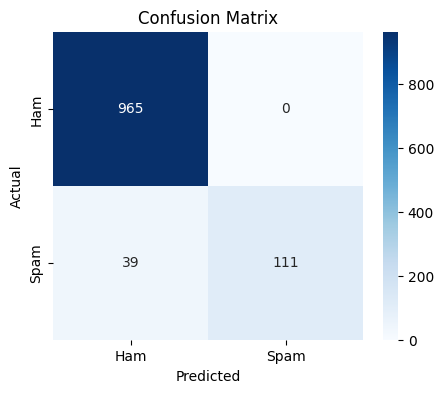

In [18]:
# Evaluate the Model
# Accuracy of the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Classification report: precision, recall, f1-score
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**TF-IDF vs CountVectorizer Comparison**

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd


In [20]:
# Initialize vectorizers
count_vectorizer = CountVectorizer(max_features=10)
tfidf_vectorizer = TfidfVectorizer(max_features=10)

# Fit and transform the processed text
count_vectors = count_vectorizer.fit_transform(df['processed_text'])
tfidf_vectors = tfidf_vectorizer.fit_transform(df['processed_text'])

# Convert to DataFrames for visualization
count_df = pd.DataFrame(count_vectors.toarray(), columns=count_vectorizer.get_feature_names_out())
tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the first few rows
print(" CountVectorizer (Top 10 Words):")
display(count_df.head())

print(" TF-IDF Vectorizer (Top 10 Words):")
display(tfidf_df.head())


 CountVectorizer (Top 10 Words):


,call,dont,free,get,go,im,know,ltgt,ok,ur
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0


 TF-IDF Vectorizer (Top 10 Words):


,call,dont,free,get,go,im,know,ltgt,ok,ur
0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0
2,0.0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.717024,0.0,0.0,0.697048,0.0,0.0,0.0,0.0,0.0


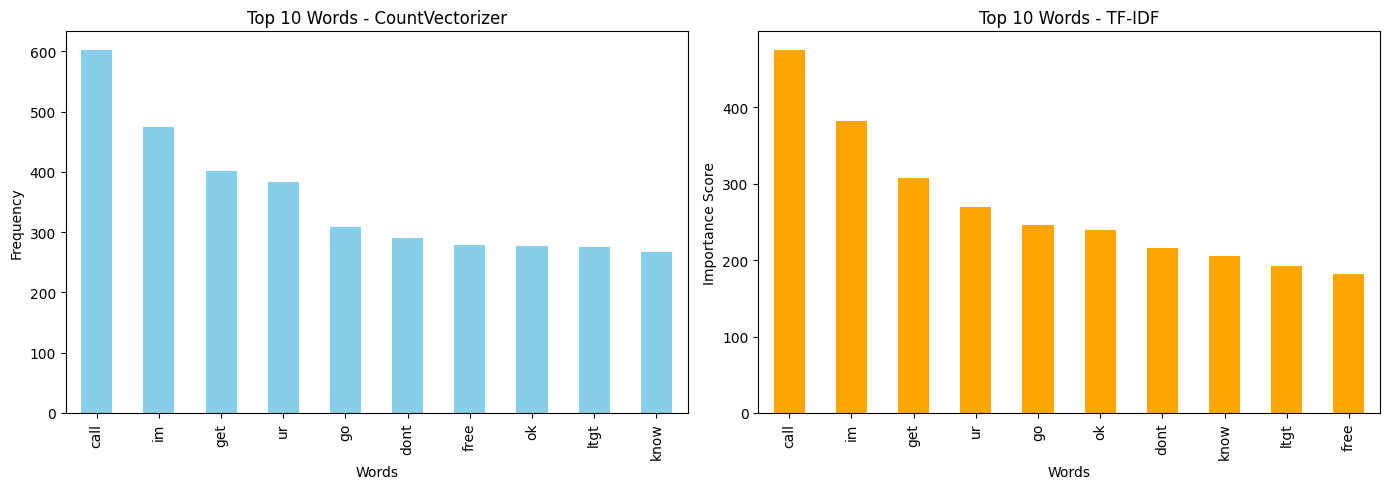

In [21]:
import matplotlib.pyplot as plt

# Sum word frequencies across all messages
count_word_freq = count_df.sum().sort_values(ascending=False)
tfidf_word_weight = tfidf_df.sum().sort_values(ascending=False)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count Vectorizer Plot
count_word_freq.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Top 10 Words - CountVectorizer')
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Words')

# TF-IDF Vectorizer Plot
tfidf_word_weight.plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Top 10 Words - TF-IDF')
axes[1].set_ylabel('Importance Score')
axes[1].set_xlabel('Words')

plt.tight_layout()
plt.show()
